# Pymaceuticals Inc.
---

### Analysis

Summary Analysis: 

There was found to be a positive correlation between tumor size and weight of the mouse. The tumor size might be dependant on the lifestyle of the mouse, healthy = smaller tumor. 

Campomulin seemed to be the most effective drug used as it decreased the tumor size. Campomulin and Ramicane seemed to be the most effective in treatment. Further research should be done with a heavy focus on those drugs. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame


# Display the data table for preview


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata
#study_results
# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='outer')  # Inner join based on 'key'
#combined_df = mouse_metadata.append(study_results, ignore_index=True)
#df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table for preview
combined_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
mouse_count = combined_df["Mouse ID"].nunique()
mouse_count

249

In [ ]:
#array(['g989'], dtype=object)

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates_mask = combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

# Filter the DataFrame to get the duplicate rows
duplicate_mice = combined_df[duplicates_mask]

# Get the Mouse IDs that have duplicates
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Print the Mouse IDs with duplicates
print("Mouse IDs with duplicates:")
print(duplicate_mouse_ids)

Mouse IDs with duplicates:
['g989']


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
index_df = combined_df.set_index('Mouse ID')
index_df.loc['g989']

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = index_df.drop(['g989'])
clean_df.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
b128,5,45.651331,0,Capomulin,Female,9,22
b128,10,43.270852,0,Capomulin,Female,9,22
b128,15,43.784893,0,Capomulin,Female,9,22
b128,20,42.731552,0,Capomulin,Female,9,22


In [8]:
# Checking the number of mice in the clean DataFrame.
#mice = clean_df["Mouse ID"].nunique()
final_df = clean_df.reset_index()
# Checking the number of mice in the clean DataFrame.
final_df['Mouse ID'].value_counts()

b128    10
q787    10
c559    10
s337    10
q511    10
        ..
n482     1
t573     1
f932     1
o848     1
x336     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stats = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
})


summary_stats_df = pd.DataFrame(summary_stats)
# Print the summary statistics table
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

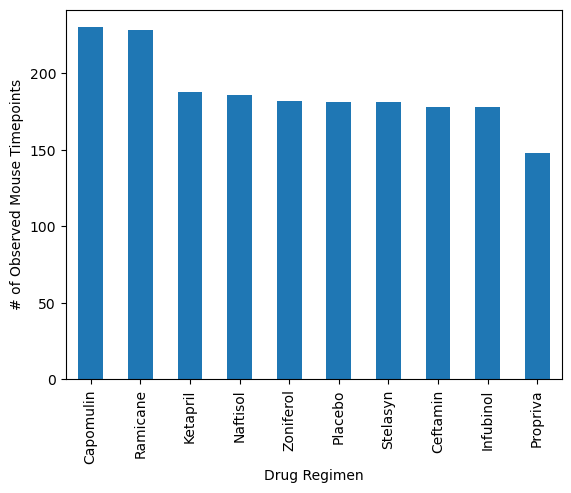

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint = final_df.groupby(['Drug Regimen'])['Timepoint'].count() #do a groupby and count for each drug regimen
# plotted a bar chart using .plot.bar() and assorted the values so they are in descending. Chained in one line of code
timepoint.sort_values(ascending=False).plot.bar() 
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

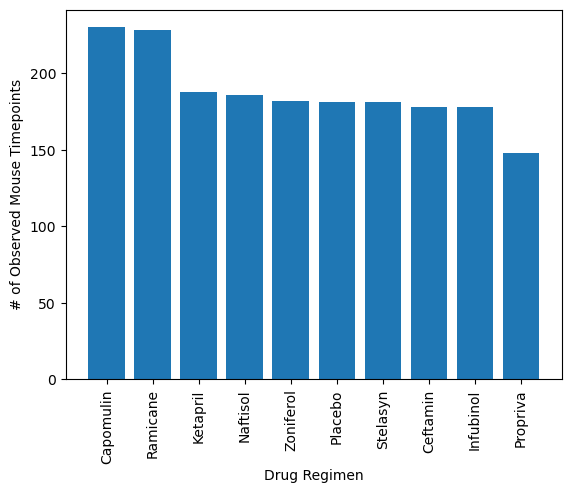

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoint_desc = timepoint.sort_values(ascending=False) # sorted values
plt.bar(timepoint_desc.index, timepoint_desc.values) 
plt.ylabel('# of Observed Mouse Timepoints', size=10)
plt.xlabel('Drug Regimen') 
plt.xticks(rotation='vertical') 
plt.show()

<Axes: ylabel='Sex'>

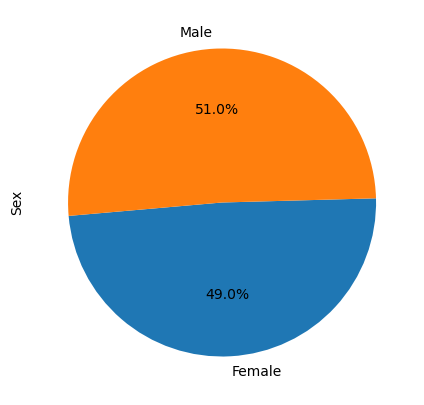

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = final_df.groupby(['Sex'])['Sex'].count()
# plotted chart using pandas 
sex.plot.pie(startangle=185,autopct='%1.1f%%', figsize=(5, 5))

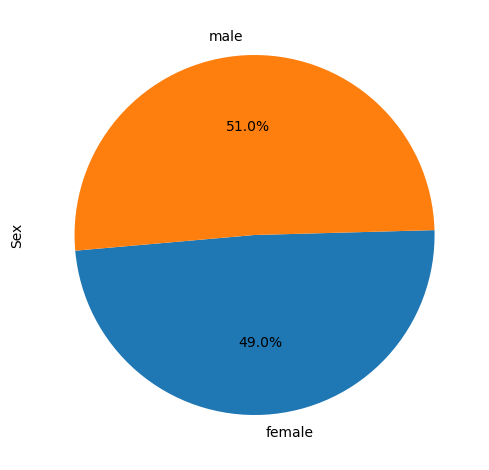

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=('female', 'male'), startangle=185, autopct='%1.1f%%')
plt.ylabel('Sex') 
plt.tight_layout() 
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

each_mouse = final_df.groupby(["Mouse ID"]).max()
each_mouse_reset = each_mouse.reset_index() 

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_df = each_mouse_reset[['Mouse ID','Timepoint']].\
    merge(final_df,on=['Mouse ID','Timepoint'],how="left")

merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
def get_outliers(regimen):
    regimen_data = merged_df.loc[merged_df["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    
    
    # Determine outliers using upper and lower bounds
    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data
    
cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


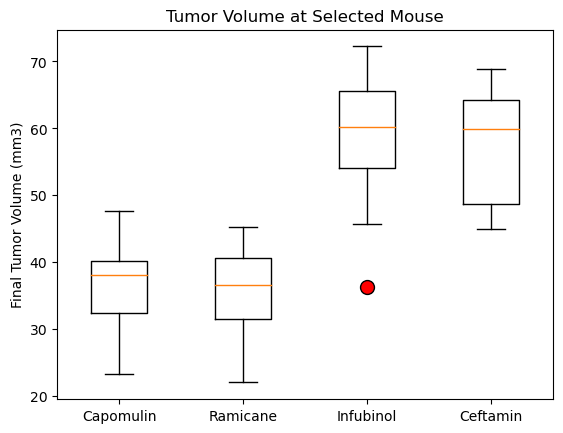

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor = "red", markersize=10)
plt.boxplot([cap, ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= red_dot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume at Selected Mouse')


plt.show()

## Line and Scatter Plots

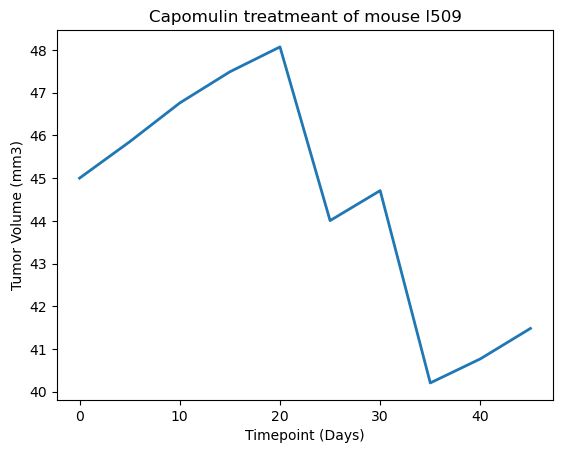

In [41]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = final_df.loc[final_df["Mouse ID"] == "l509",:]
line_df

x_axis_TP = line_df["Timepoint"] 

tumor_size = line_df["Tumor Volume (mm3)"] 

plt.title('Capomulin treatmeant of mouse l509') # created title
# the plot function plt.plot() with x and y values and customizations
plt.plot(x_axis_TP, tumor_size,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

/var/folders/c9/9w8x95jd1f5fjjhn66vbs76c0000gn/T/ipykernel_80029/194113647.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capavg = cap_df.groupby(['Mouse ID']).mean()


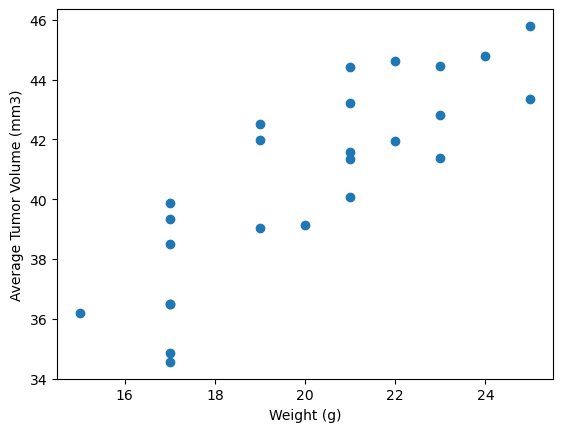

In [42]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_df = final_df.loc[final_df["Drug Regimen"] == "Capomulin",:]
# capavg is datadrame created to plot
capavg = cap_df.groupby(['Mouse ID']).mean()

plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()


## Correlation and Regression

In [37]:
#calculating linear regression and correlation coeff 
corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])

print(corr)
print(model)

0.84
LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)


In [38]:
#slope and intercept found from the calculations above 
slope = 0.9544396890241045
intercept = 21.552160532685015

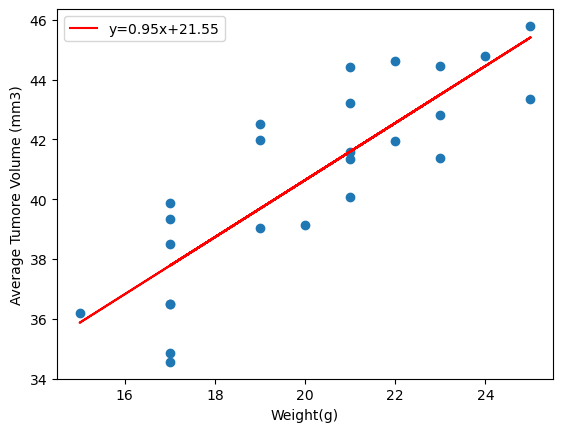

In [40]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


#equation for the linear regression model 
line = slope*(capavg['Weight (g)'])+intercept

# creating scatter plot
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
#plotting linear regression model
plt.plot(capavg['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.legend()
plt.savefig('linearregression')
plt.show()